**A/B АНАЛИЗ И ПРОВЕРКА ГИБОТЕЗ ДЛЯ УВЕЛИЧЕНИЯ ВЫРУЧКИ ИНТЕРНЕТ МАГАЗИНА**

**СТРУКТУРА РАБОТЫ:**

**Часть 1. Приоритизация гипотез.**

**Задачи части 1:**

1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста**

**Задачи части 2:**

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

14. Примите решение по результатам теста и объясните его. 

Варианты решений: 

1. Остановить тест, зафиксировать победу одной из групп. 

2. Остановить тест, зафиксировать отсутствие различий между группами. 

3. Продолжить тест.

In [1]:
import pandas as pd
import scipy.stats as stats
from scipy import stats as st
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [5]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


*В таблице orders и visitors некорректные форматы дат, необходимо поправить*

In [6]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [7]:
visitors.info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


**ЧАСТЬ 1**

**Применим фреймворк ICE для приоритизации гипотез**

*Для расчета ICE необходимо 
Impact (насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта) умножить на Confidence (насколько вы уверены, что это изменение повлияет на пользователей именно так) и поделить на
Efforts(сколько стоит протестировать эту гипотезу)*

In [8]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [9]:
pd.options.display.max_colwidth = 400
display(hypothesis[['ICE','Hypothesis']].sort_values('ICE', ascending=False))


,ICE,Hypothesis
8,16.200000,"Запустить акцию, дающую скидку на товар в день рождения"
0,13.333333,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
7,11.200000,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
6,8.000000,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
2,7.000000,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
1,2.000000,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,1.333333,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
3,1.125000,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
4,1.000000,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


**Применим фреймворк RICE для приоритизации гипотез**

*Для расчета RICE необходимо 
Reach (скольких пользователей затронет изменение, которое вы хотите внести) умножить на 
Impact (насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта) и на
Confidence (насколько вы уверены, что это изменение повлияет на пользователей именно так), и раздедлить на
Efforts (сколько стоит протестировать эту гипотезу)*

In [10]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [11]:
display(hypothesis[['RICE','Hypothesis']].sort_values('RICE', ascending=False))
pd.options.display.max_colwidth = 400

,RICE,Hypothesis
7,112.0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
2,56.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
0,40.0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
6,40.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения"
3,9.0,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
1,4.0,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,4.0,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
4,3.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


**Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE**

<AxesSubplot:xlabel='Hypothesis'>

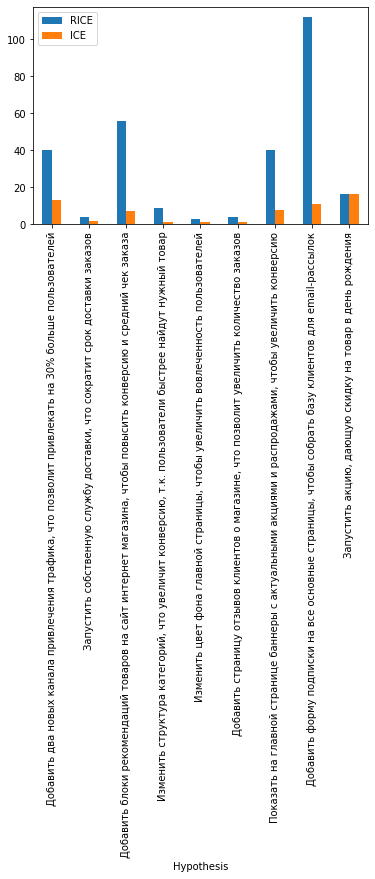

In [12]:
hypothesis[['Hypothesis', 'RICE','ICE']].set_index('Hypothesis').plot(kind='bar')

*Приоритизация отличается у двух фремфорков, так как в расчете RICE добавляется параметр Reach — скольких пользователей затронет изменение, которое вы хотите внести. При этом оба фреймворка показывают одинаковые значения по гипотезе в 8 строке.*

**ЧАСТЬ 2**

**Проверим корректность разбиения полтзователей на группы и корректность дат в таблицах**

In [13]:
#check_data_group = orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True) == visitors[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)
#display(check_data_group)

In [14]:
#print(check_data_group['date'].sum(), check_data_group['group'].sum())

*Дубликаты удалены, данные на совпадения проверены*

In [15]:
orders_check = orders.groupby('visitorId').agg({'group':'nunique'}).reset_index().query('group > 1')
orders_check = orders_check['visitorId']
orders = orders.query("visitorId not in @orders_check")

In [16]:
#orders_check = orders.groupby('visitorId')['group'].nunique().reset_index()
#orders_check = orders_new.query('group>1')
#orders = orders[~orders['visitorId'].isin(orders_check['visitorId'])]

**1. Построим график кумулятивной выручки по группам. Сформировав сводную таблицу.**

In [17]:
datesGroups = orders[['date', 'group']].drop_duplicates()

In [18]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date': 'max','group': 'max','transactionId': 'nunique','visitorId': 'nunique','revenue': 'sum',}),axis=1,).sort_values(by=['date', 'group'])

In [19]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),axis=1,).sort_values(by=['date', 'group'])

In [20]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date','group','orders','buyers','revenue','visitors',]

In [21]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

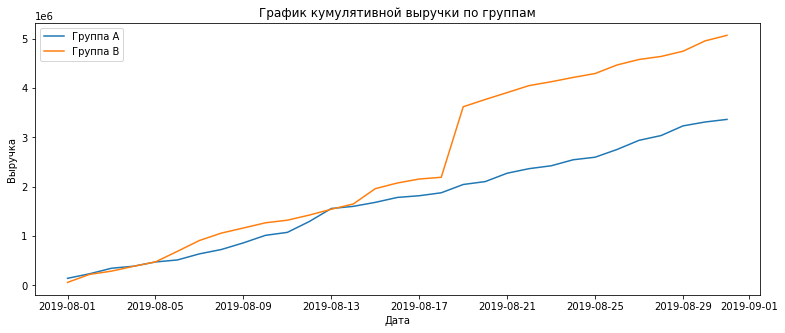

In [22]:
plt.figure(figsize=(13,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Группа A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Группа B')

plt.legend() 

plt.title('График кумулятивной выручки по группам')

plt.ylabel('Выручка')

plt.xlabel('Дата')

plt.show()

*Выручка группы 'B' стабильно выше выручки группы 'A'*

**2. Построим график кумулятивного среднего чека по группам.**

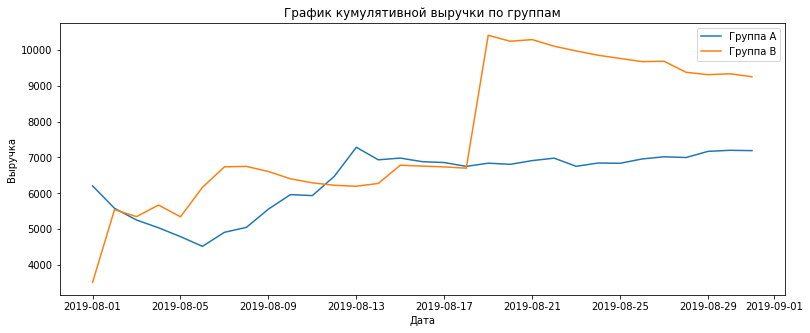

In [23]:
plt.figure(figsize=(13,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Группа A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Группа B')

plt.legend() 

plt.title('График кумулятивной выручки по группам')

plt.ylabel('Выручка')

plt.xlabel('Дата')

plt.show()

*Данные по среднему чеку показывают лидерство группы В. Но видим резкий рост, который возможно произошел из-за аномалий*

**3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.**

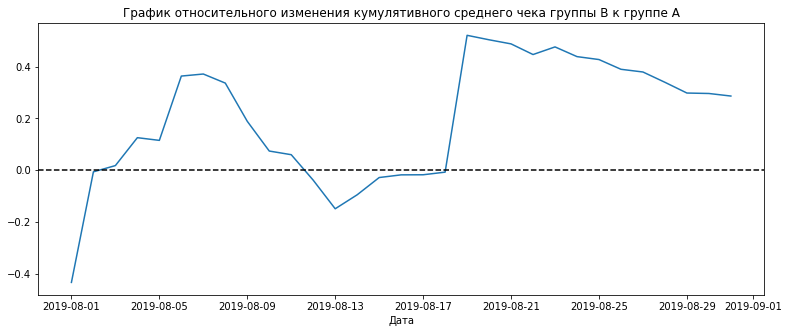

In [24]:
plt.figure(figsize=(13,5))

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

plt.xlabel('Дата')

plt.show()

*Волотивность большая, неободимо будет проверить аномалии*

**4. Построим график кумулятивной конверсии по группам**

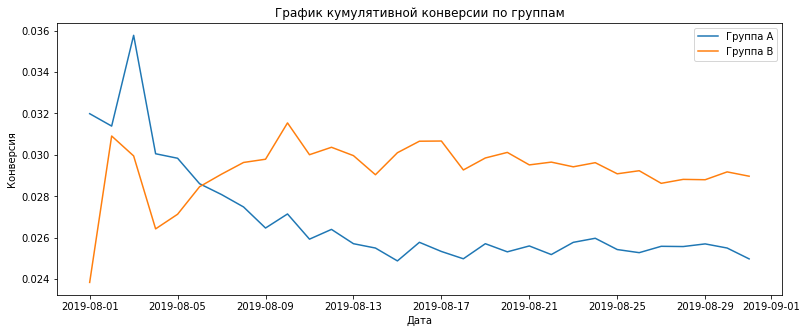

In [25]:
cumulativeData ['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(13,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Группа B')
plt.legend()
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()

*Конверсия группы В явно показывает лучший резльтат*

 **5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.**

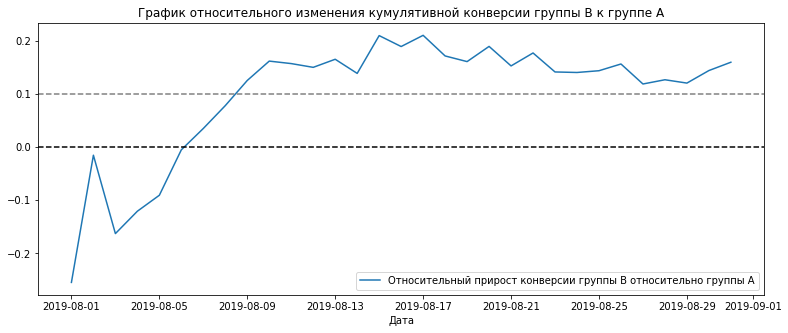

In [26]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(13,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.show()

*Конверсия группы В выше группы А на 10%*

**6. Построим точечный график количества заказов по пользователям.**

In [27]:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))
ordersByUsers.columns = ['visitorId', 'orders']

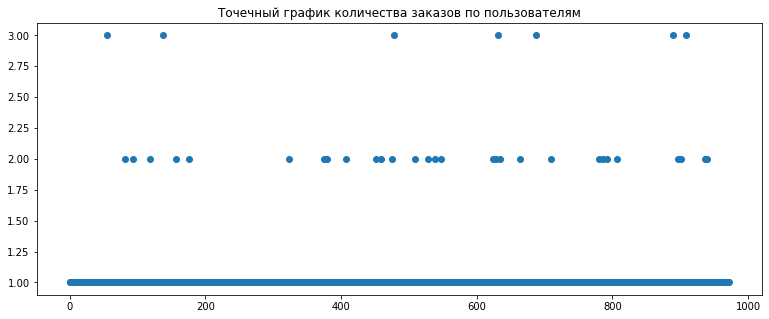

In [28]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(13,5))
plt.scatter(x_values,ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.show()

*Согласно точечному графику, клиенты редко совершают более 2х заказов*

**7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.**

In [29]:
print(np.percentile(ordersByUsers['orders'],[95,99]))

[1. 2.]


*Больше 1-го заказа совершают 5% пользователей*

**8. Построим точечный график стоимостей заказов.**

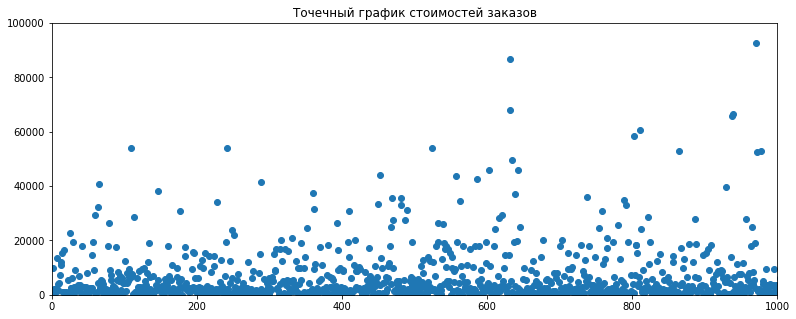

In [30]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(13,5))
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1000, 0, 100000])
plt.title('Точечный график стоимостей заказов')
plt.show()

*В основном клиенты делают заказ до 20 000 р.*

**9. Посчитаем 95-й и 99-й перцентили стоимости заказов.**

In [31]:
print(np.percentile(orders['revenue'],[95,99]))

[26785. 53904.]


*Только 5% процентов заказов имеют стоимость выше 28 000*

**10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.**

In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA =(orders[orders['group']== 'A'].groupby('visitorId', as_index = False).agg({'transactionId':pd.Series.nunique}))

ordersByUsersA.columns = ['visitorId','orders']

ordersByUsersB =(orders[orders['group']== 'B'].groupby('visitorId', as_index = False).agg({'transactionId':pd.Series.nunique}))

ordersByUsersB.columns = ['visitorId','orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.011
0.160


Гипотезы:

H0: Нет различий между группами 

H1: Есть различия между группами

In [33]:
alpha = 0.05
if (stats.mannwhitneyu(sampleA, sampleB)[1] < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


*Согласно сделанным расчетам делаем вывод, что конверсия групп А и В статистически значима. P-value меньше 0.05. Относилтельный прирост конверсии группы В к конверсии группы А равен 13,8%*

**11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным**

In [34]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


In [35]:
if (stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1] < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


*Проверили аномальный заказ, который дает такую высокую разницу в среднем чеке*

*P-value больше 0.05, значит статистически значимых различий нет. Относительное различие среднего чека между сегментами 26%, которое не является статистически значимым*

In [36]:
print(orders[orders['group'] == 'B']['revenue'].max())

1294500


*Проверили аномальный заказ, который дает такую высокуб разницу в среднем чеке*

**12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.**

In [37]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId'],
    ],
    axis=0,
)

revenue_lim = 26785
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']

In [38]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values(ascending = True)
)

In [39]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [40]:
print(len(abnormalUsers))
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

86
0.016
0.174


In [41]:
if (stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


*Количество аномальных пользователей - 74. Разница статистически значима. P-value меньше 0.05. Относительный прирост конверсии группы В к группе А составляет 17,3%*

**13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.**

In [42]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]))
print("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()/ orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1)) 

0.727
-0.034


In [43]:
if (stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1] < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


*Разница в среднем чеке между группами составляет всего 2% P-value больше 0.05, значит различий между группами нет в среднем чеке. *

**14. Примим решение по результатам теста.**

**Решение:**

*Остановить тест, зафиксировать победу группы В.*

*1. Разница в пользу группы В по "сырым" данным составляет 13,8%*

*2. Разница в пользу группы В по "очищенным" данным составляет 17,4%*

*3.  Разница в коверсии по 2м группам в "очищенных" и "сырых" данных есть.*

*4. По данным среднего чего, различий между группами нет. При этом средний чек группы В в "очищенных" данных меньше на 2%, а в "сырых" данных выше на 26%. Такая разница связана c аномальным заказом на 1 294 500 р.* 

*Итого, согласно проведенному А/В - тесту видим более высокие показания в данных по группе В*